## PCA Implementation
Objective: The objective of this assignment is to implement PCA on a given dataset and analyse the results.

Instructions:

Download the wine dataset from the UCI Machine Learning Repository

Load the dataset into a Pandas dataframe.

Split the dataset into features and target variables.

Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

Implement PCA on the preprocessed dataset using the scikit-learn library.

Determine the optimal number of principal components to retain based on the explained variance ratio.

Visualise the results of PCA using a scatter plot.

Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

Interpret the results of PCA and clustering analysis.

In [70]:
##importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


In [71]:
##importing dataset
df=pd.read_csv('wine.data',sep=',',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [72]:
##splitting dataset
X=df
y=df.pop(0)

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [74]:
##performing data preprocessing
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [75]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.871054,-0.501609,-0.045300,-0.852616,0.009458,0.502441,0.851956,-0.742375,0.175723,-0.558235,0.651051,1.922364,0.957767
1,1.071434,2.380986,-0.531956,0.121046,-1.380927,-1.966736,-1.648405,0.283947,-1.576987,-0.057014,-1.594727,-1.727646,-1.066063
2,-0.802709,-0.909523,-1.467835,-1.024439,-1.049883,0.411551,0.477886,-0.584480,0.314552,-0.968324,1.159529,0.199887,-1.023628
3,-0.897005,-1.108948,-2.328843,-0.795342,3.319900,-0.648832,-0.723075,-1.768698,1.581361,-0.991107,1.371395,0.651012,-0.076998
4,-0.177995,0.867170,-0.269910,-0.022140,-0.851257,-1.209320,-1.333399,0.283947,-1.073733,2.385297,-1.001502,-1.153487,-0.184718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,1.047860,-0.818876,1.115189,1.552903,-0.983674,1.017483,0.832268,-1.216063,0.488087,-0.749610,1.710381,0.774046,-1.082384
115,-0.849857,-0.619451,-0.943743,-0.165325,-1.380927,-0.951798,0.015221,0.047103,0.071602,-0.740497,0.184946,0.787717,-0.755960
116,1.660787,-0.492544,0.029571,-2.169924,0.075667,1.547675,1.600096,-0.584480,2.379625,1.127689,1.032410,0.555319,2.629059
117,-0.331226,-0.800746,-0.419651,0.321506,-1.380927,-1.360803,-0.545884,1.705009,0.054248,-0.899976,0.015454,-0.729703,-0.804924


In [76]:
##performing PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [77]:
X_train

,0,1,2,3,4,5
0,2.523523,0.038368,-0.306369,-0.022575,-0.542771,-0.544472
1,-4.160205,-0.740660,-1.410690,1.081600,-0.254388,-0.568617
2,1.056214,2.432869,-1.404982,0.315229,-0.262239,0.019263
3,2.070512,1.408914,-1.667433,-1.948177,3.161404,2.105194
4,-2.870444,-1.465832,-1.078208,0.217866,-0.175386,-0.430008
...,...,...,...,...,...,...
114,1.637573,1.227669,1.747116,0.156375,-0.540338,-1.597222
115,-0.275140,2.077926,-0.736183,0.428367,-0.460526,-0.231758
116,4.252298,-2.272107,-1.039305,0.570168,-1.076388,0.815896
117,-1.754757,1.590036,-0.174344,-0.149073,-1.404511,0.663250


In [78]:
print(pca.explained_variance_)

[4.76569501 2.44292998 1.568369   0.99483262 0.91742208 0.56311797]


In [89]:
# load the dataset and preprocess again
df = pd.read_csv('wine.data', sep=',', header=None)

y = df.pop(0)
x = df

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=24)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [91]:
# write a function for finding optimal number of principal components
def optimal_no_components(x_train):
    """
    A function to determine the number of components that will capture over 90% variance ratio
    """
    count=0
    for i in range(1,12):
        pca = PCA(n_components=i)
        pca.fit_transform(x_train)
        count+=1
        if sum(pca.explained_variance_ratio_)>0.90:
            break
    return count


In [93]:
optimal_number = optimal_no_components(x_train)
print(f"The number of PCA components that will capture 90% variance ratio is: {optimal_number}")


The number of PCA components that will capture 90% variance ratio is: 8


In [94]:
#lets transform our data now
pca = PCA(n_components=8)

x_train = pd.DataFrame(pca.fit_transform(x_train))
x_test = pd.DataFrame(pca.transform(x_test))

In [95]:
#lets verify that we captured over 90% variance ratio
print(sum(pca.explained_variance_ratio_)*100)

91.83458918125145


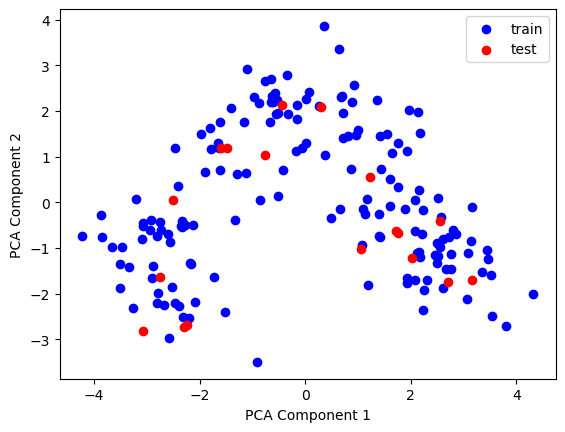

In [96]:
##isualizing PCA result
import matplotlib.pyplot as plt

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c='blue', label='train')
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c='red', label='test')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [97]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,init='k-means++')
kmeans.fit_predict(x_train)

train_labels = kmeans.labels_

#get the cluster labels for the test data
test_labels = kmeans.fit_predict(x_test)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


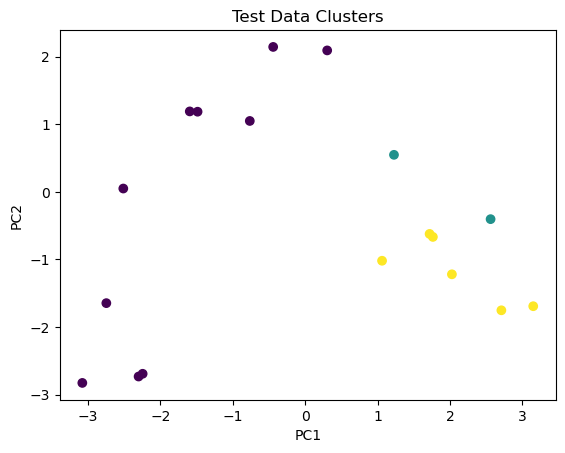

In [98]:

#create a scatter plot of the first two principal components of the test data, colored by cluster label
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=test_labels)
plt.title('Test Data Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
##Interpreting the clusters
As we can see in the grapth the points that are closer to each other have been grouped together into a single cluster. There are total of 3 clusters because we set n_clusters=3 while instantating the kmeans object